# Tut 14

This tutorial deals with advanced scientific computing, i.e solving ordinary differential equations of order 1 and 2 usiing scipy in python.

Simulate a star using the polytropic model, it is obtained by combining  hydrostatic equilibrium with the equation of conservation of mass and then assuming an equation of state.

The final equation, also known as the Lane-Emden equation is given by:

(1/𝜉^2)(𝑑/𝑑𝜉)(𝜉^2(𝑑𝜃/𝑑𝜉))=−𝜃^𝑛

Here  𝜉  is called the scaled radius and  𝜃  the polytropic temperature.

Your task is to numerically solve the Lane-Emden equation for n = 0,1,2,3,4,5 (Hint: You need to perform a task repeatedly. What do we do when we need to perform similar tasks repeatedly?) and make the plots of  𝜃  vs  𝜉  in each case. Before deciding to jump aboard, you should answer the following questions:

1) What are the dependent and the independent variables you need to consider?
2) What are the model parameters?
3) How many initial conditions will you need?
4) What are the initial conditions? Note that you can't supply arbitrary initial conditions, since the fundamental scientific constraint you have is that the star you have created must be physical !!! 



First there is some test code taken from the tutorial for practice. It is followed by my solution of the Task.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
#imports

In [78]:
def my_derivative(t, y, a, b, c):  #derivative function which will be solved
    #t is the independent variable,y is the dependent variable, a and b are parameters. The order matters.
    return a*y + b*(t) + c

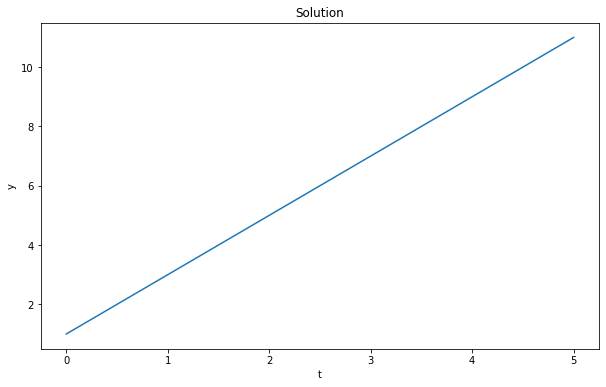

In [79]:
t_span = (0, 5)  #range of time for which equation is solved
t = np.linspace(0,5,100)   #range if values at which solution is found
y0 = np.array([1])  #initial condition

a = 1
b = -2
c = 1
#constraints

sol = solve_ivp(my_derivative,t_span, y0, t_eval = t, args = (a,b,c)) #solution


solution = sol.y[0]
time_points = sol.t

plt.figure(figsize = (10,6))
plt.plot(time_points, solution)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution')
plt.show() #plotted the solution

In [80]:
def shm_derivative(t, state, gamma, eps):  #higher order ODE function
    #time is the independent variable, state is the dependent variable
    x = state[0]
    y = state[1]
    return [y, -2*gamma*y - eps*x] #We return the list of derivatives of each individual ODE

In [93]:
t_span = (0,10) #t0 and tf
t = np.linspace(0,10,1000) #evaluation time points
init_state = [1,0] #The initial state of the system
gamma = 1
eps = 0.1
sol = solve_ivp(shm_derivative, t_span, init_state, t_eval = t, args = (gamma, eps))
state = sol.y
print(state.shape)

(2, 1000)


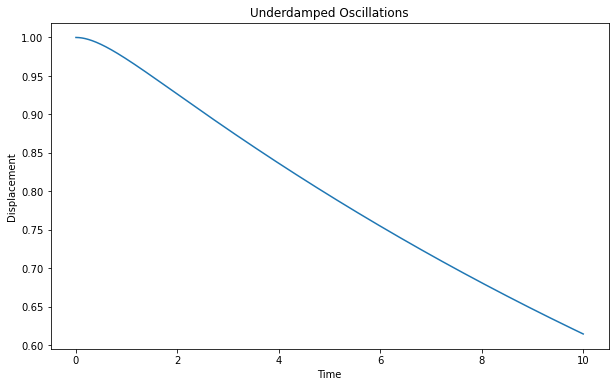

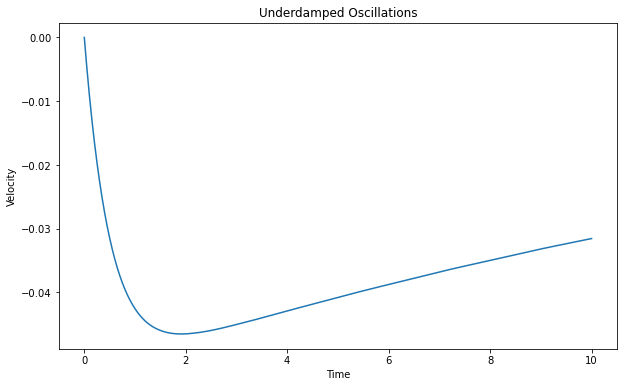

In [94]:
x_underdamped = state[0]
#access y (the velocity)
y_underdamped = state[1]


plt.figure(figsize = (10,6))
plt.plot(t, x_underdamped)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Underdamped Oscillations')
plt.show()

plt.figure(figsize = (10,6))
plt.plot(t, y_underdamped)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Underdamped Oscillations')
plt.show()

In [103]:
def star_derivative(eps, state, n):  #derivative function for the star. Assumed k = d theta/ d epsilon
    #time is the independent variable, state is the dependent variable
    k = state[0]  #inital term is k
    theta = state[1]  #second term is theta
    return [-2*(k/eps)-theta**n, k]  #returns a vector, derivative of both the terms

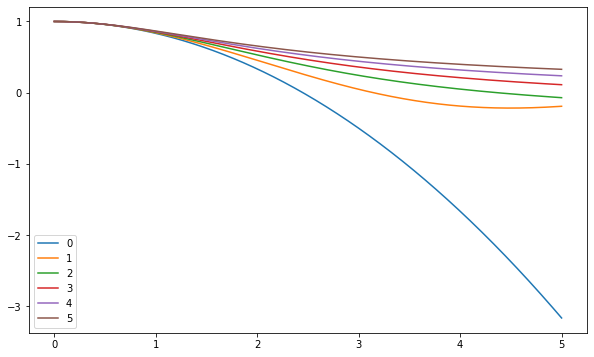

In [109]:
eps_span = (0.001,10) #t0 and tf


eps = np.linspace(0.001,5,1000) #evaluation time points

init_state = [0,1] #The initial state of the system

plt.figure(figsize = (10,6))

for n in range(6):  #plotting for all 6 values of n
    sol = solve_ivp(star_derivative, eps_span, init_state, t_eval = eps, args = (n,)) #solution through scipy
    state = sol.y
    k_vals = state[0]
    theta_vals = state[1]
  #  print(np.shape(k_vals),np.shape(theta_vals),np.shape(eps))
    plt.plot(eps, theta_vals, label = n)
    plt.legend()